In [1]:
import pandas as pd
from datetime import date, timedelta
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
today = date.today()

In [3]:
d1= today.strftime("%Y-%m-%d")
end_date=d1
d2= date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date =d2

In [4]:
df= yf.download("GOOG",
               start=start_date,
               end= end_date,
               progress=False)
df["Date"] = df.index
df=df[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
df.reset_index(drop=True, inplace=True)
print(df.tail())

          Date        Open        High         Low       Close   Adj Close  \
246 2023-12-22  142.130005  143.250000  142.054993  142.720001  142.720001   
247 2023-12-26  142.979996  143.945007  142.500000  142.820007  142.820007   
248 2023-12-27  142.830002  143.320007  141.050995  141.440002  141.440002   
249 2023-12-28  141.850006  142.270004  140.828003  141.279999  141.279999   
250 2023-12-29  140.679993  141.434998  139.899994  140.929993  140.929993   

       Volume  
246  18494700  
247  11170100  
248  17288400  
249  12192500  
250  14872700  


In [5]:
df = df[["Date", "Close"]]
print(df.head())

        Date      Close
0 2022-12-30  88.730003
1 2023-01-03  89.699997
2 2023-01-04  88.709999
3 2023-01-05  86.769997
4 2023-01-06  88.160004


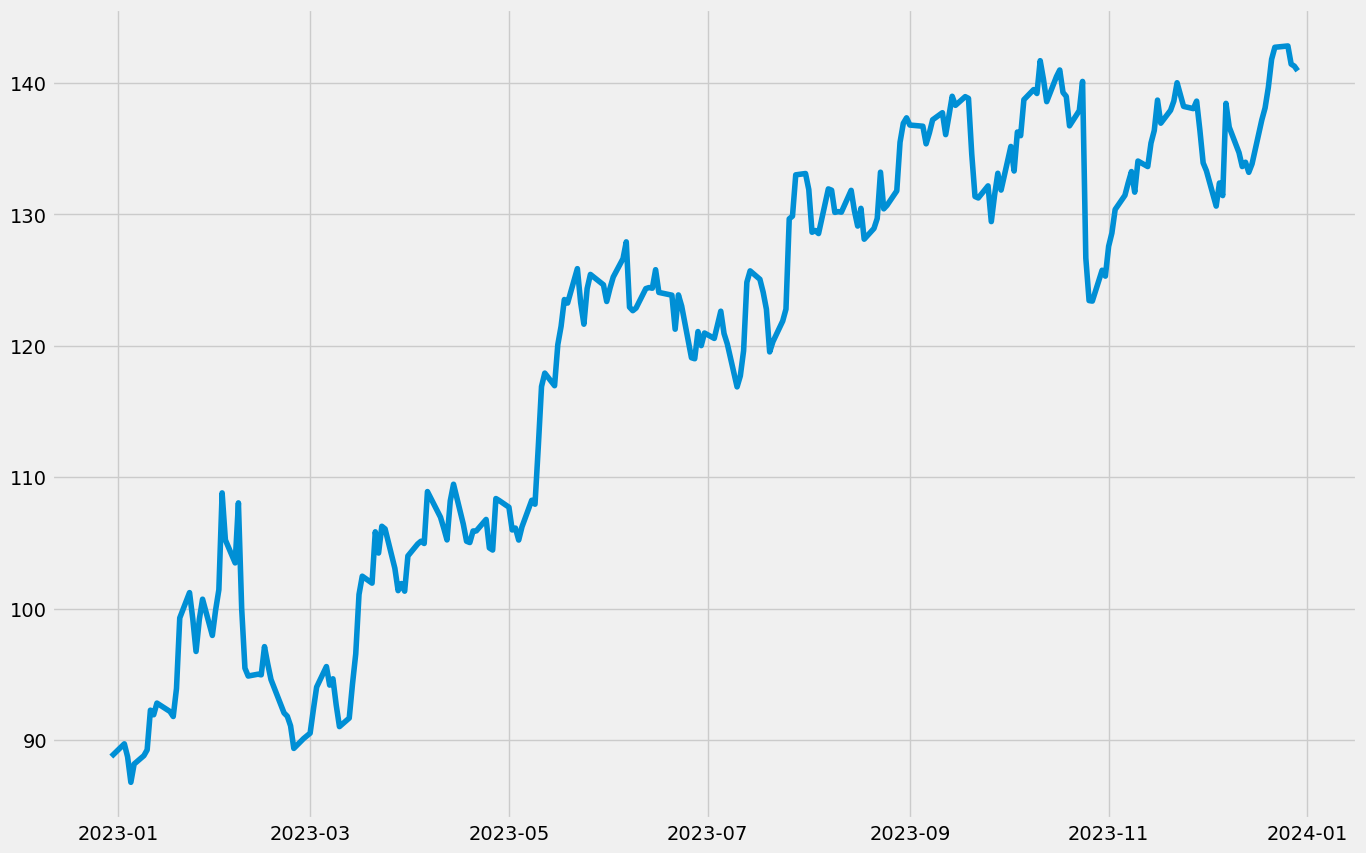

In [6]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,10))
plt.plot(df["Date"], df["Close"])

<Figure size 640x480 with 0 Axes>

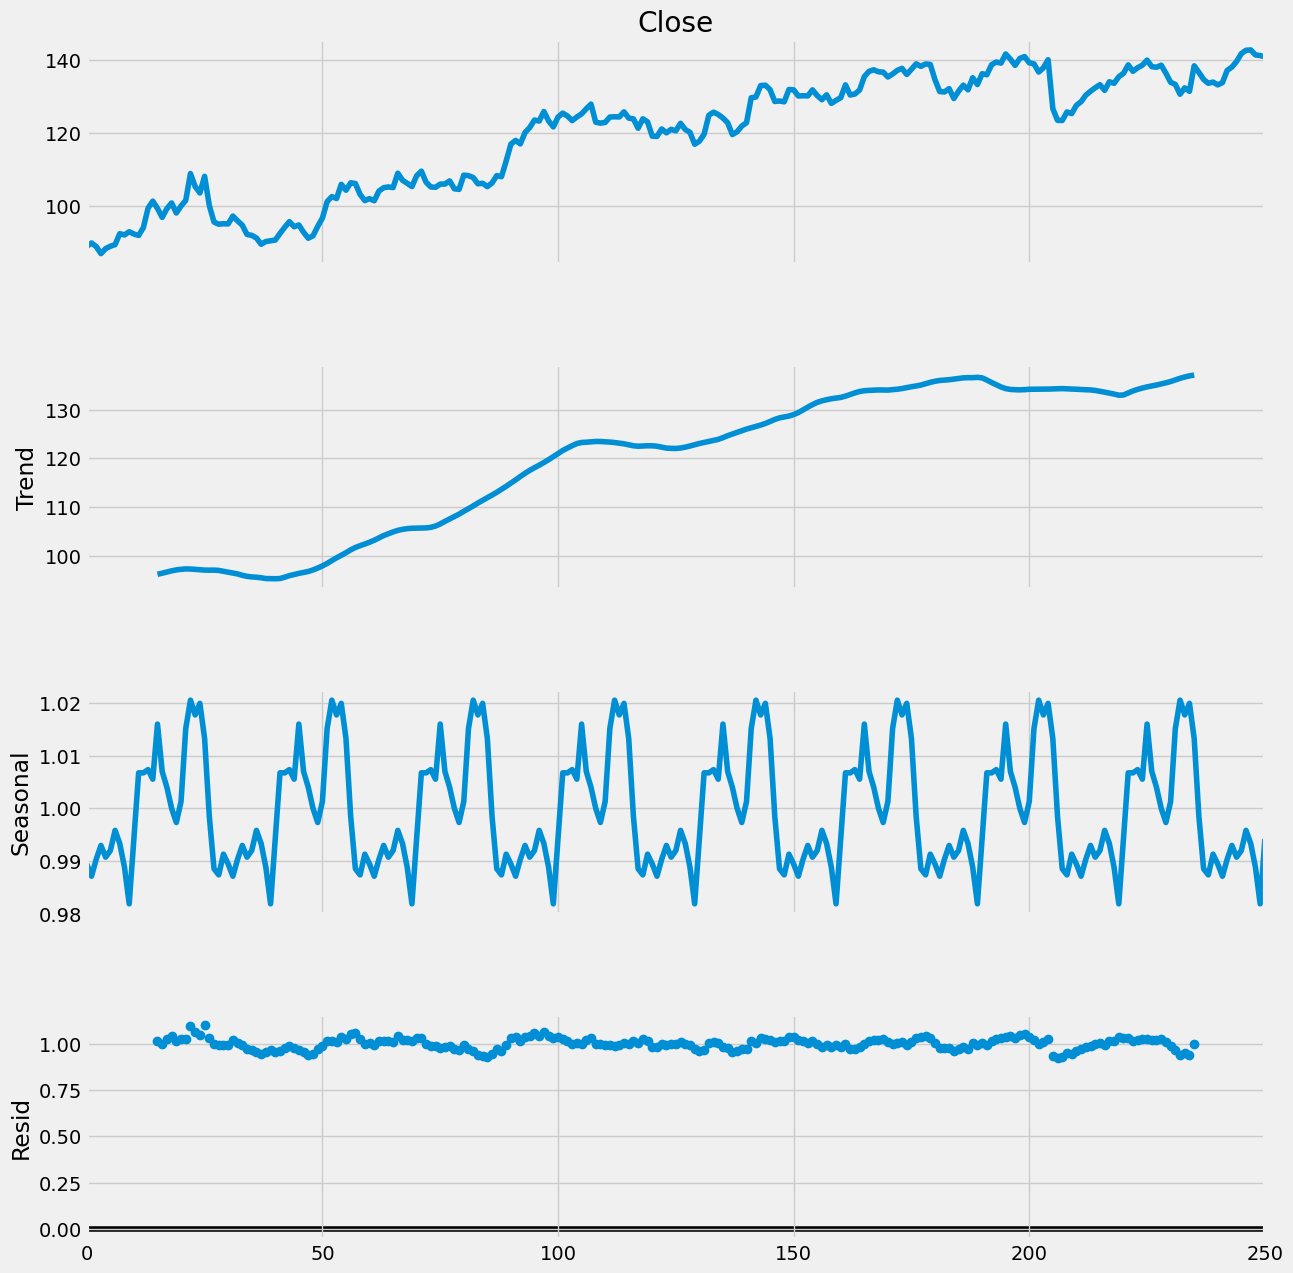

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["Close"],
                           model="multiplicative", period= 30)
fig = plt.figure()
fig= result.plot()
fig.set_size_inches(15,15)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

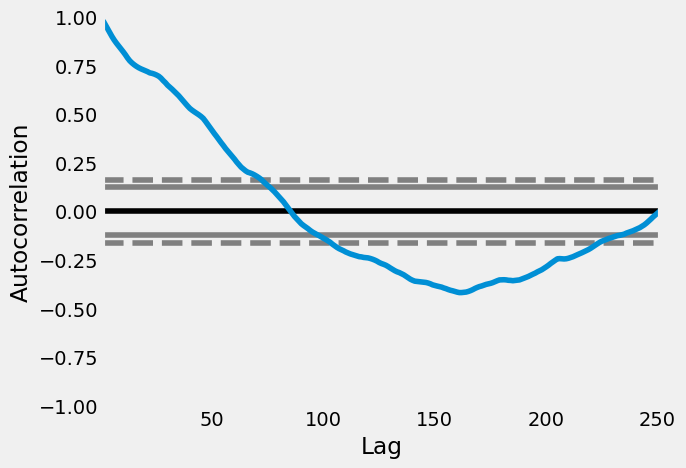

In [8]:
pd.plotting.autocorrelation_plot(df["Close"])

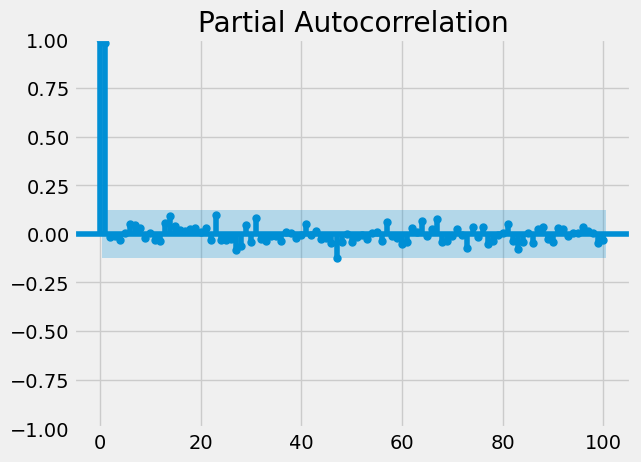

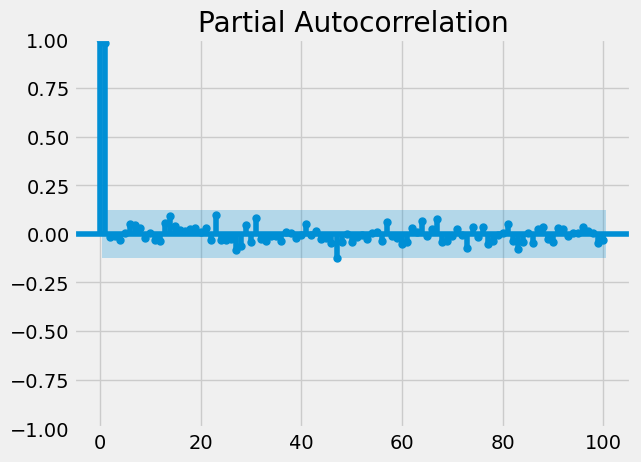

In [9]:
plot_pacf(df["Close"], lags = 100)

In [11]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(df['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -541.871
Date:                            Sat, 30 Dec 2023   AIC                           1113.742
Time:                                    22:25:24   BIC                           1165.827
Sample:                                         0   HQIC                          1134.733
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4475      0.081     17.920      0.000       1.289       1.606
ar.L2         -1.0196      0.128   

In [12]:
predictions = model.predict(len(df), len(df)+30)
print(predictions)

251    141.301219
252    142.029569
253    140.870037
254    140.478197
255    141.324353
256    140.017777
257    139.889859
258    139.882251
259    140.552582
260    141.543907
261    142.622729
262    143.966185
263    144.764798
264    144.586558
265    141.402302
266    139.600215
267    140.002973
268    140.473403
269    141.724710
270    143.058761
271    144.263331
272    144.748805
273    144.275879
274    143.328832
275    143.053515
276    142.925439
277    140.581078
278    140.289945
279    141.846450
280    142.033917
281    142.758157
Name: predicted_mean, dtype: float64


<Axes: >

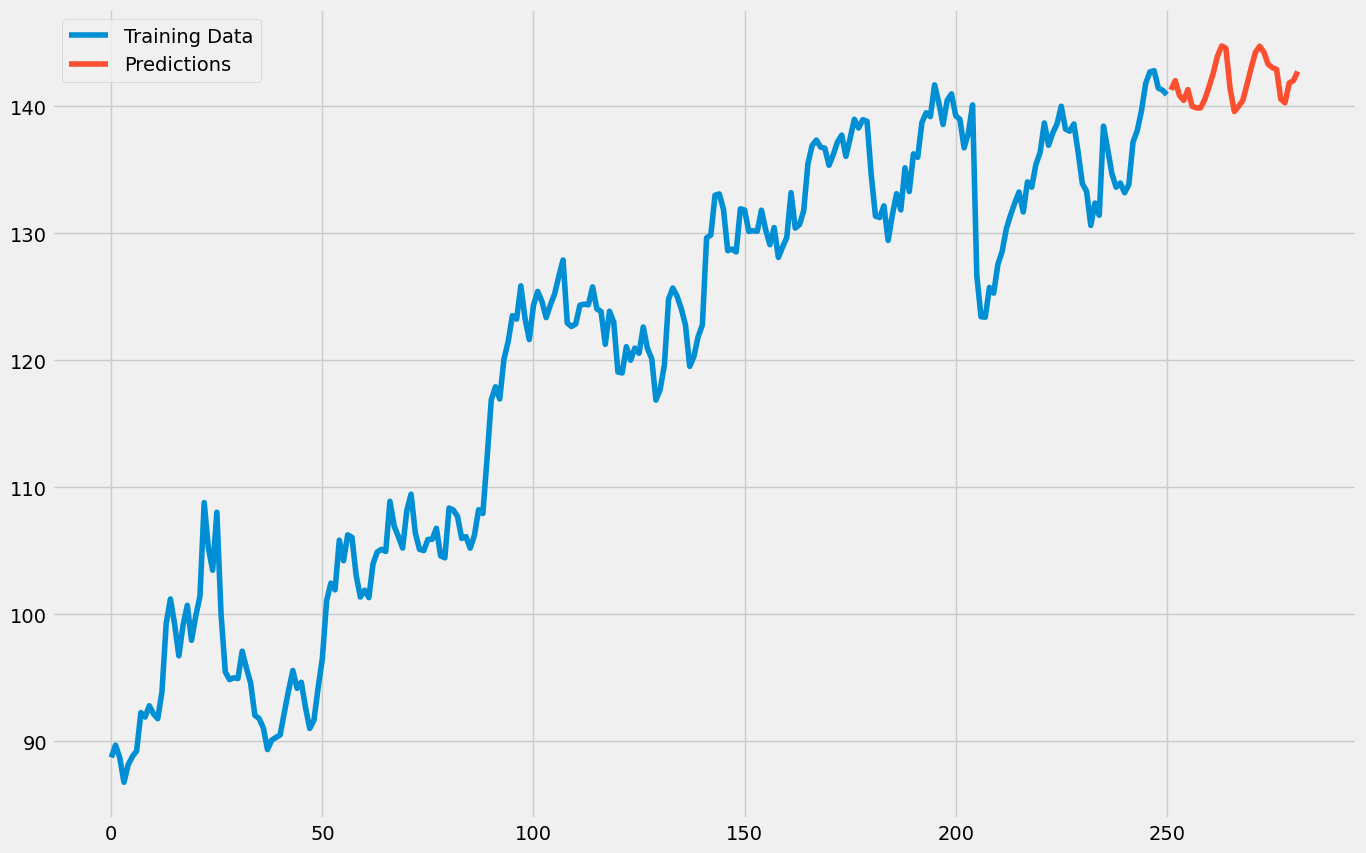

In [13]:
df["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")